In [1]:
from PIL import Image, ImageOps # load and show an image with Pillow
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from scipy.stats import beta # Distribution type
from sklearn import preprocessing # Normalization

def Edges_of_Images(array_2d, depth_num): # returns the edges of an Images fla
    edge_array = array_2d[:,0:depth_num].reshape(-1)
    edge_array = np.concatenate((edge_array, gray_image_data[:,gray_image_data.shape[1]-depth_num:gray_image_data.shape[1]].reshape(-1))) # returns the last depth_num columms
    edge_array = np.concatenate((edge_array, gray_image_data[0:depth_num,:].reshape(-1))) # returns the first depth_num rows
    edge_array = np.concatenate((edge_array, gray_image_data[gray_image_data.shape[0]-depth_num:gray_image_data.shape[0],:].reshape(-1))) # returns the last depth_num rows
    return edge_array

def Delete_Values_Lower_Than_Threshold(array_1d,threshold):
    list_1d = list(array_1d)
    i = 0
    while i < len(list_1d):
        if(list_1d[i]<=threshold):
            del list_1d[i]
        else:
            i += 1
    return list_1d

Original Image: (3784, 2838, 4)
Gray Original Image: (3784, 2838)
Gray Image Resized:  (756, 567)
99th percentile of arr :  18.0
Mean Original: 42.719187126153614
SD Original: 26.301752956468476


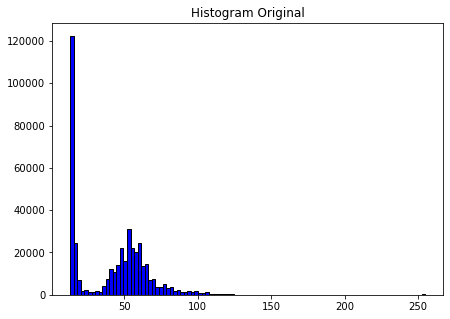

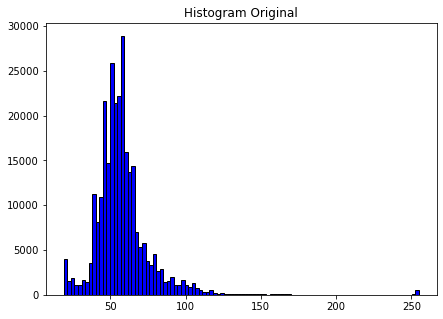

In [2]:
# Open the image form working directory
image = Image.open("D:/Ultrasound/Slices-Images/2019_03_13-M01-20.png")
# convert image to numpy array
image_data = asarray(image) 
print("Original Image:",image_data.shape)
# applying grayscale method
gray_image = ImageOps.grayscale(image)
# convert image to numpy array
gray_image_data = asarray(gray_image)
print("Gray Original Image:",gray_image_data.shape)

# resize image
scale_percent = 20 # percent of original size
width = int(gray_image_data.shape[1] * scale_percent / 100)
height = int(gray_image_data.shape[0] * scale_percent / 100)
dim = (width, height)
gray_image_data_resized = cv.resize(gray_image_data, dim, interpolation = cv.INTER_AREA)
print("Gray Image Resized: ",gray_image_data_resized.shape)

# Edges of an Image
image_edges_list = Edges_of_Images(gray_image_data_resized,10)
value_percentile = np.percentile(image_edges_list, 99)
print("99th percentile of arr : ", value_percentile)
image_edges_list_higher_than_percentile = Delete_Values_Lower_Than_Threshold(image_edges_list,value_percentile)

gray_image_data_resized_flattened = gray_image_data_resized.reshape(-1)
gray_image_data_higher_than_percentile = Delete_Values_Lower_Than_Threshold(gray_image_data_resized_flattened,value_percentile)

#calculate standard deviation and means of images
gray_image_data_std = np.std(gray_image_data_resized_flattened)
gray_image_data_mean = np.mean(gray_image_data_resized_flattened)
print("Mean Original:",gray_image_data_mean)
print("SD Original:",gray_image_data_std)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.hist(gray_image_data_resized_flattened, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Original")
plt.show()

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.hist(gray_image_data_higher_than_percentile, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Original")
plt.show()

Original Image: (3068, 2240, 4)
Gray Original Image: (3068, 2240)
Gray Image Resized:  (306, 224)
99th percentile of arr :  18.0


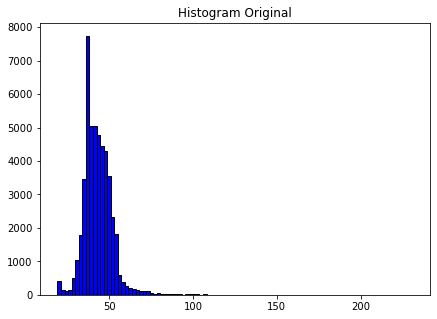

(100,)


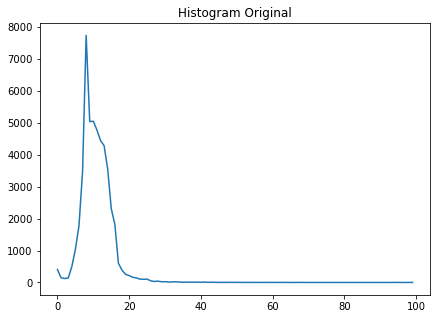

Original List: (100, 1)


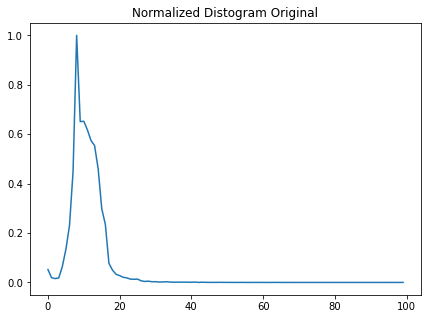

In [2]:
# Open the image form working directory
image = Image.open("D:/Ultrasound/Slices-Images/2019_03_13-M01-13.png")
# convert image to numpy array
image_data = asarray(image) 
print("Original Image:",image_data.shape)
# applying grayscale method
gray_image = ImageOps.grayscale(image)
# convert image to numpy array
gray_image_data = asarray(gray_image)
print("Gray Original Image:",gray_image_data.shape)

# resize image
scale_percent = 10 # percent of original size
width = int(gray_image_data.shape[1] * scale_percent / 100)
height = int(gray_image_data.shape[0] * scale_percent / 100)
dim = (width, height)
gray_image_data_resized = cv.resize(gray_image_data, dim, interpolation = cv.INTER_AREA)
print("Gray Image Resized: ",gray_image_data_resized.shape)

# Edges of an Image
image_edges_list = Edges_of_Images(gray_image_data_resized,10)
value_percentile = np.percentile(image_edges_list, 99)
print("99th percentile of arr : ", value_percentile)
image_edges_list_higher_than_percentile = Delete_Values_Lower_Than_Threshold(image_edges_list,value_percentile)

gray_image_data_resized_flattened = gray_image_data_resized.reshape(-1)
gray_image_data_higher_than_percentile = Delete_Values_Lower_Than_Threshold(gray_image_data_resized_flattened,value_percentile)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.hist(gray_image_data_higher_than_percentile, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Original")
plt.show()

gray_image_data_hist, _ = np.histogram(gray_image_data_higher_than_percentile, bins=100)
print(gray_image_data_hist.shape)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(gray_image_data_hist)
plt.title("Histogram Original")
plt.show()

# Normalization
list = np.array(gray_image_data_hist.reshape(-1,1))
print('Original List:',list.shape)
scaler = preprocessing.MinMaxScaler()
gray_image_data_hist_normalized = scaler.fit_transform(list)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(gray_image_data_hist_normalized)
plt.title("Normalized Distogram Original")
plt.show()

In [6]:
from scipy.stats import pearsonr

a_best = 0
b_best = 0
corr_best = 0
for a in np.arange(1, 100, 0.2):
    for b in np.arange(1, 100, 0.2):
        beta_x_val = np.linspace(0,1, 100)
        beta_y_val = beta.pdf(beta_x_val, a, b)
        corr, _ = pearsonr(gray_image_data_hist_normalized.reshape(-1), beta_y_val.reshape(-1))
        if(corr>corr_best):
            corr_best = corr
            a_best = a
            b_best = b

print(corr_best, a_best, b_best)

C:\Users\jacob\anaconda3\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


0.970398730503392 8.799999999999997 72.99999999999999


Original List: (100, 1)


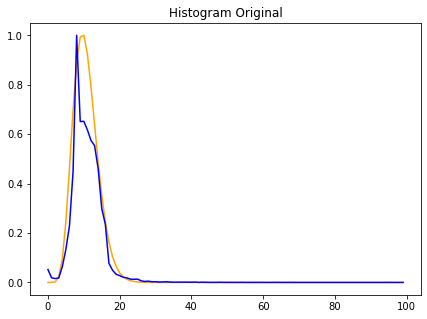

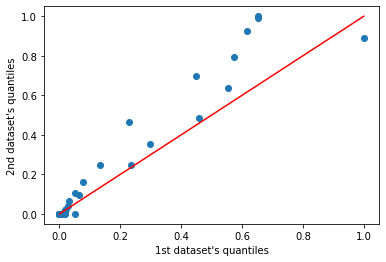

In [7]:
a, b = 8.7, 73
#mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x_3 = np.linspace(0,1, 100)
vals_3 = beta.pdf(x_3, a, b)

# Normalization
list = np.array(vals_3.reshape(-1,1))
print('Original List:',list.shape)
scaler = preprocessing.MinMaxScaler()
normalizedlist=scaler.fit_transform(list)

# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(normalizedlist,'orange')
plt.plot(gray_image_data_hist_normalized,'blue')
plt.title("Histogram Original")
plt.show()

x1 = gray_image_data_hist_normalized
x2 = normalizedlist
plt.scatter(x1,x2)
plt.plot([min(x1),max(x1)],[min(x1),max(x1)],color="red")
plt.xlabel("1st dataset's quantiles")
plt.ylabel("2nd dataset's quantiles")
plt.show()

In [17]:
from scipy.stats import chisquare
observed = normalizedlist.reshape(-1)
print(observed.shape)
expected = gray_image_data_hist_normalized.reshape(-1) * np.sum(observed)
print(expected.shape)

(100,)
(100,)


In [18]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(observed, expected)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.253


In [12]:
observed_small = 10*observed[0:90]
print(observed_small)
expected_small = 10*expected[0:90]
print(expected_small)

[0.00000000e+00 3.54786743e-03 9.71336323e-02 5.43684553e-01
 1.58371229e+00 3.21728493e+00 5.19261389e+00 7.13727506e+00
 8.70788784e+00 9.68515195e+00 1.00000000e+01 9.70957852e+00
 8.95014159e+00 7.88864156e+00 6.68530508e+00 5.47112473e+00
 4.33886468e+00 3.34377856e+00 2.50988820e+00 1.83841622e+00
 1.31607950e+00 9.22000862e-01 6.32790503e-01 4.25852101e-01
 2.81224666e-01 1.82353452e-01 1.16161774e-01 7.27248279e-02
 4.47628711e-02 2.70945925e-02 1.61310271e-02 9.44747417e-03
 5.44352081e-03 3.08581002e-03 1.72098939e-03 9.44240542e-04
 5.09612828e-04 2.70515368e-04 1.41208673e-04 7.24696697e-05
 3.65568021e-05 1.81205999e-05 8.82325233e-06 4.21870836e-06
 1.97993613e-06 9.11701630e-07 4.11694779e-07 1.82218191e-07
 7.90050967e-08 3.35350013e-08 1.39261997e-08 5.65387593e-09
 2.24234846e-09 8.68041941e-10 3.27694029e-10 1.20521801e-10
 4.31398019e-11 1.50112414e-11 5.07168905e-12 1.66155726e-12
 5.27093057e-13 1.61659042e-13 4.78551240e-14 1.36485097e-14
 3.74294723e-15 9.848726

In [13]:
chisq_val, p_val = chisquare(observed_small,expected_small)
print(chisq_val)
print(p_val)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
5.332256814365071

C:\Users\jacob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\jacob\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1826: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
C:\Users\jacob\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singu

,sumsquare_error,aic,bic,kl_div
wald,1743.415904,5313.264642,569.661862,inf
loguniform,1877.603199,inf,657.627090,inf
reciprocal,1877.603199,inf,657.627090,inf
exponweib,2908.662872,2076.328021,1095.324502,inf
exponnorm,3501.373226,4825.808153,1273.878508,inf


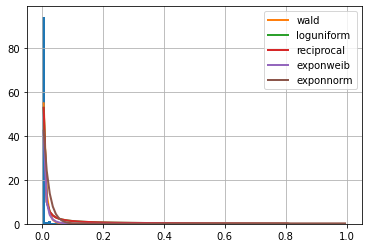

C:\Users\jacob\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\jacob\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\jacob\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4837: 

In [13]:
from fitter import Fitter, get_common_distributions, get_distributions
import pandas as pd
import seaborn as sns

f = Fitter(gray_image_data_hist_normalized,
           distributions=get_distributions())
f.fit()
f.summary()


In [1]:
import imageio

In [2]:
i1 = imageio.imread("Slices/slice-t1.png")
print(i1.shape)

(4170, 2878, 4)


In [ ]:
image_control = Image.open("D:/Ultrasound/Slices-Images/2019_03_13-M01-19-control.png")


In [3]:
from PIL import Image

img = Image.open("Slices/slice-t1.png")
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2878x4170 at 0x2282FA0C4C0>


In [4]:
imgGray = img.convert('L')
print(imgGray)
#imgGray.save('test_gray.jpg')

<PIL.Image.Image image mode=L size=2878x4170 at 0x2282E224670>


In [12]:
# load and show an image with Pillow
from PIL import Image, ImageOps
from numpy import asarray

# Open the image form working directory
image = Image.open("Slices/slice-t1-control.png")
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
image.show()

# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))
# summarize image details
print(image2.mode)
print(image2.size)

PNG
(589, 504)
RGBA
<class 'numpy.ndarray'>
(504, 589, 4)
<class 'PIL.Image.Image'>
RGBA
(589, 504)


In [13]:
# applying grayscale method
gray_image = ImageOps.grayscale(image)
gray_image.show()

# convert image to numpy array
data = asarray(gray_image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))
# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(504, 589)
<class 'PIL.Image.Image'>
L
(589, 504)


In [14]:
print(data[0])

[56 54 53 48 51 48 50 51 49 46 53 50 50 55 54 53 48 47 50 50 49 52 50 47
 53 54 47 50 52 52 50 47 48 51 50 49 52 54 53 52 52 55 50 54 53 51 49 54
 50 48 55 51 55 52 53 55 55 53 59 56 55 56 53 55 55 57 60 57 57 62 59 63
 61 59 66 60 59 57 58 59 54 58 58 56 53 57 61 57 57 57 60 55 59 59 59 58
 60 55 58 57 57 60 61 59 60 60 59 58 55 56 56 56 58 52 58 57 58 60 56 61
 58 62 59 57 65 55 63 59 63 56 61 59 55 55 56 63 57 62 55 58 60 52 58 57
 59 54 59 59 54 56 57 56 58 58 60 56 61 58 61 64 58 60 62 56 59 58 58 55
 62 55 58 56 60 62 60 54 60 56 62 59 57 58 65 60 56 59 56 56 56 52 59 55
 59 53 56 56 55 53 55 57 58 55 56 61 53 55 56 55 52 58 59 56 52 57 53 51
 58 53 55 57 58 58 55 57 58 52 56 53 55 53 61 58 61 61 63 58 58 57 58 59
 59 61 64 69 75 79 80 76 75 84 88 80 75 69 58 60 57 57 60 61 62 60 56 57
 59 53 57 59 57 55 54 53 58 55 53 51 58 53 55 54 49 57 54 56 53 53 51 54
 51 53 55 51 52 55 51 49 50 52 54 58 55 57 55 54 49 55 53 53 57 51 55 52
 50 53 53 53 56 51 48 49 51 50 51 54 54 51 53 52 51

In [15]:
import numpy as np

#calculate standard deviation of list
control_std = np.std(data[0])
control_mean = np.mean(data[0])
print(control_mean)
print(control_std)

55.60950764006791
4.817939516404052


In [36]:
list_values_of_interest = []
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        if(data[i,j]>100+2*control_std):
            list_values_of_interest.append(data[i,j])
list_values_of_interest = np.array(list_values_of_interest)
print(list_values_of_interest)

[136 116 138 ... 109 106 109]


In [37]:
print(list_values_of_interest.shape)

(207078,)


In [17]:
print(data.shape)
data_flattened = data.reshape(-1)
print(data_flattened.shape)

(504, 589)
(296856,)


(array([2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.3000e+01,
        0.0000e+00, 4.4000e+01, 0.0000e+00, 9.1000e+01, 0.0000e+00,
        2.1800e+02, 0.0000e+00, 4.1500e+02, 0.0000e+00, 1.1150e+03,
        0.0000e+00, 2.6240e+03, 0.0000e+00, 5.1530e+03, 0.0000e+00,
        1.0214e+04, 0.0000e+00, 1.6907e+04, 0.0000e+00, 2.2088e+04,
        0.0000e+00, 3.0294e+04, 0.0000e+00, 3.4724e+04, 0.0000e+00,
        3.3037e+04, 0.0000e+00, 3.4129e+04, 0.0000e+00, 2.9730e+04,
        0.0000e+00, 2.4238e+04, 0.0000e+00, 1.7160e+04, 0.0000e+00,
        1.3119e+04, 0.0000e+00, 8.7920e+03, 0.0000e+00, 5.2480e+03,
        0.0000e+00, 3.3210e+03, 0.0000e+00, 1.8410e+03, 0.0000e+00,
        0.0000e+00, 1.0520e+03, 0.0000e+00, 5.7400e+02, 0.0000e+00,
        2.8600e+02, 0.0000e+00, 1.4800e+02, 0.0000e+00, 9.7000e+01,
        0.0000e+00, 6.5000e+01, 0.0000e+00, 3.4000e+01, 0.0000e+00,
        1.9000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 1.0000e+01, 0.0000e+00, 8.00

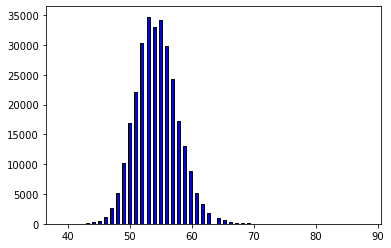

In [18]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(data_flattened, color = 'blue', edgecolor = 'black', bins=100)


Original Image: (4170, 2878, 4)
Control Image: (504, 589, 4)
Gray Original Image: (4170, 2878, 4)
Gray Control Image: (504, 589, 4)
Gray Control Image Flattend: (12001260,)
Gray Control Image Flattend: (296856,)
Mean Original: 54.16883777203394
SD Original: 17.20515881386997
Mean Control: 54.38304093567251
SD Control: 3.4455381340427067


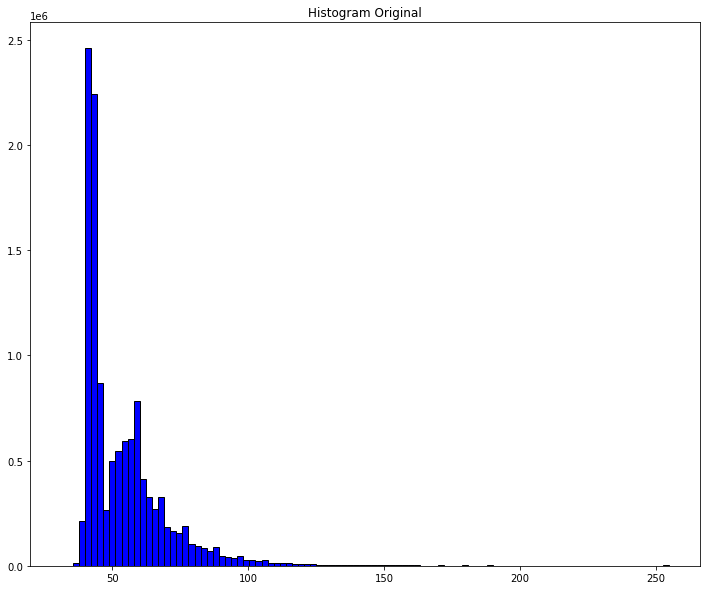

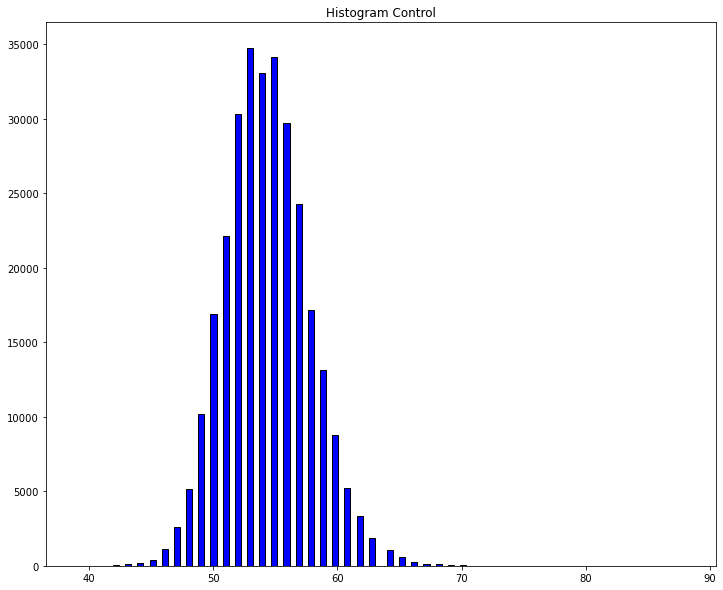

In [19]:
# load and show an image with Pillow
from PIL import Image, ImageOps
from numpy import asarray
import numpy as np

# Open the image form working directory
image = Image.open("Slices/slice-t1.png")
image_control = Image.open("Slices/slice-t1-control.png")

# convert image to numpy array
image_data = asarray(image)
image_control_data = asarray(image_control)
print("Original Image:",image_data.shape)
print("Control Image:",image_control_data.shape)

# applying grayscale method
gray_image = ImageOps.grayscale(image)
gray_image_control = ImageOps.grayscale(image_control)

# convert image to numpy array
gray_image_data = asarray(gray_image)
gray_image_control_data = asarray(gray_image_control)
print("Gray Original Image:",image_data.shape)
print("Gray Control Image:",image_control_data.shape)


#calculate standard deviation and means of images
gray_image_data_flattened = gray_image_data.reshape(-1)
print("Gray Control Image Flattend:",gray_image_data_flattened.shape)
gray_image_control_data_flattened = gray_image_control_data.reshape(-1)
print("Gray Control Image Flattend:",gray_image_control_data_flattened.shape)

gray_image_data_std = np.std(gray_image_data_flattened)
gray_image_data_mean = np.mean(gray_image_data_flattened)
print("Mean Original:",gray_image_data_mean)
print("SD Original:",gray_image_data_std)
gray_image_control_data_std = np.std(gray_image_control_data_flattened)
gray_image_control_data_mean = np.mean(gray_image_control_data_flattened)
print("Mean Control:",gray_image_control_data_mean)
print("SD Control:",gray_image_control_data_std)

# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(gray_image_data_flattened, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Original")
plt.show()
# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(gray_image_control_data_flattened, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Control")
plt.show()

In [23]:
list_values_of_interest = []
for i in range(0,gray_image_data.shape[0]):
    for j in range(0,gray_image_data.shape[1]):
        if(gray_image_data[i,j]>gray_image_control_data_mean+2*gray_image_control_data_std):
            list_values_of_interest.append(gray_image_data[i,j])
list_values_of_interest = np.array(list_values_of_interest)
print(list_values_of_interest.shape)

(2714515,)


Mean Values of Interest: 78.03260803495284
SD  of Interest: 20.68712130253876


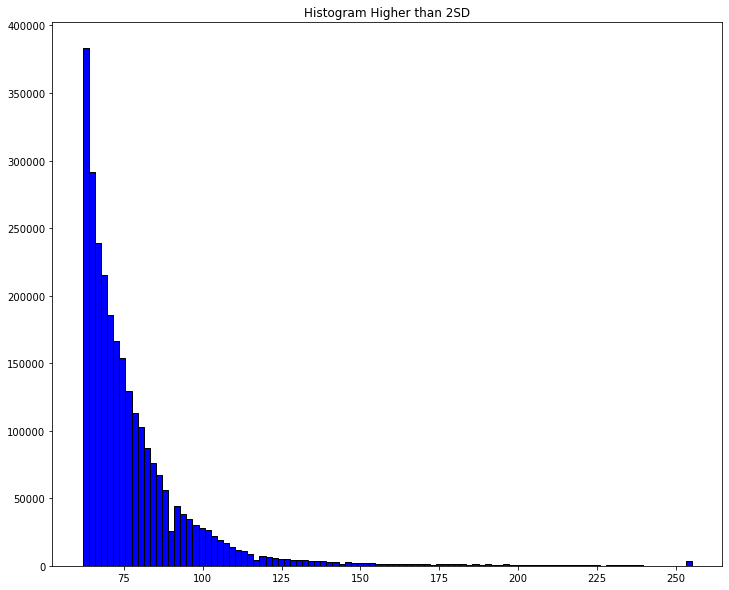

In [25]:
list_values_of_interest_std = np.std(list_values_of_interest)
list_values_of_interest_mean = np.mean(list_values_of_interest)
print("Mean Values of Interest:",list_values_of_interest_mean)
print("SD  of Interest:",list_values_of_interest_std)

# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(list_values_of_interest, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Higher than 2SD")
plt.show()

Original Image: (3776, 2575, 4)
Control Image: (278, 469, 4)
Gray Original Image: (3776, 2575, 4)
Gray Control Image: (278, 469, 4)
Gray Control Image Flattend: (9723200,)
Gray Control Image Flattend: (130382,)
Mean Original: 45.075167948823434
SD Original: 27.235698426087026
Mean Control: 52.1281925419153
SD Control: 7.40626224149098


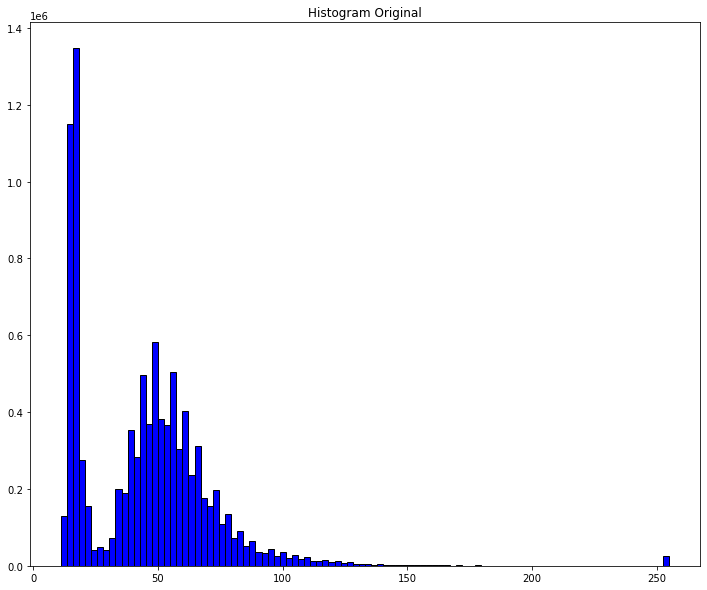

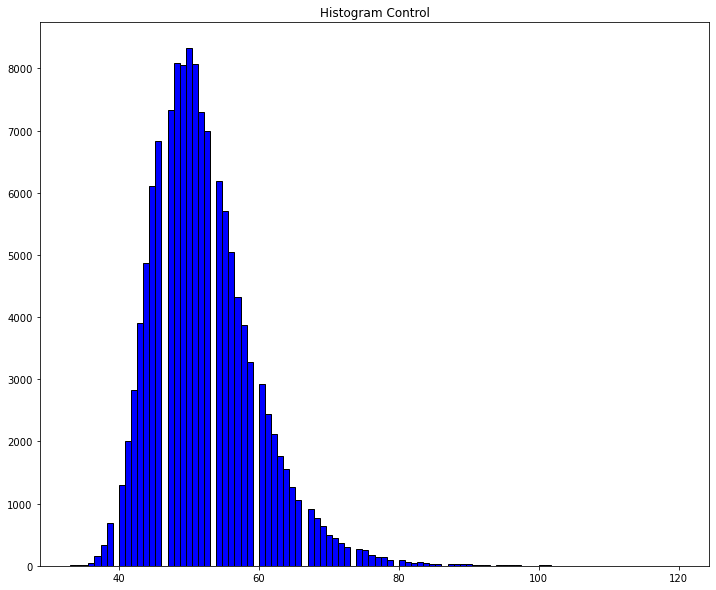

In [5]:
  # load and show an image with Pillow
from PIL import Image, ImageOps
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt

# Open the image form working directory
image = Image.open("D:/Ultrasound/Slices-Images/2019_03_13-M01-19.png")
image_control = Image.open("D:/Ultrasound/Slices-Images/2019_03_13-M01-19-control.png")

# convert image to numpy array
image_data = asarray(image)
image_control_data = asarray(image_control)
print("Original Image:",image_data.shape)
print("Control Image:",image_control_data.shape)

# applying grayscale method
gray_image = ImageOps.grayscale(image)
gray_image_control = ImageOps.grayscale(image_control)

# convert image to numpy array
gray_image_data = asarray(gray_image)
gray_image_control_data = asarray(gray_image_control)
print("Gray Original Image:",image_data.shape)
print("Gray Control Image:",image_control_data.shape)


#calculate standard deviation and means of images
gray_image_data_flattened = gray_image_data.reshape(-1)
print("Gray Control Image Flattend:",gray_image_data_flattened.shape)
gray_image_control_data_flattened = gray_image_control_data.reshape(-1)
print("Gray Control Image Flattend:",gray_image_control_data_flattened.shape)

gray_image_data_std = np.std(gray_image_data_flattened)
gray_image_data_mean = np.mean(gray_image_data_flattened)
print("Mean Original:",gray_image_data_mean)
print("SD Original:",gray_image_data_std)
gray_image_control_data_std = np.std(gray_image_control_data_flattened)
gray_image_control_data_mean = np.mean(gray_image_control_data_flattened)
print("Mean Control:",gray_image_control_data_mean)
print("SD Control:",gray_image_control_data_std)

# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(gray_image_data_flattened, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Original")
plt.show()
# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(gray_image_control_data_flattened, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Control")
plt.show()

(1428032,)
Mean Values of Interest: 63.014157245776005
SD  of Interest: 10.60688761315761


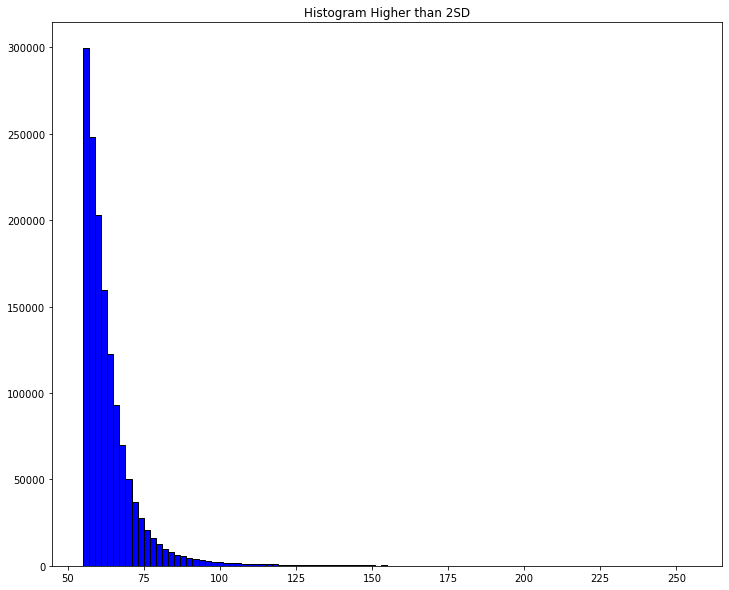

In [4]:
list_values_of_interest = []
for i in range(0,gray_image_data.shape[0]):
    for j in range(0,gray_image_data.shape[1]):
        if(gray_image_data[i,j]>gray_image_control_data_mean+2*gray_image_control_data_std):
            list_values_of_interest.append(gray_image_data[i,j])
list_values_of_interest = np.array(list_values_of_interest)
print(list_values_of_interest.shape)

list_values_of_interest_std = np.std(list_values_of_interest)
list_values_of_interest_mean = np.mean(list_values_of_interest)
print("Mean Values of Interest:",list_values_of_interest_mean)
print("SD  of Interest:",list_values_of_interest_std)

# matplotlib histogram
plt.figure(1, figsize=(12,10))
plt.hist(list_values_of_interest, color = 'blue', edgecolor = 'black', bins=100)
plt.title("Histogram Higher than 2SD")
plt.show()